In [2]:
import pandas as pd
import numpy as np
import os

print("Current Working Directory:", os.getcwd())


Current Working Directory: /Users/shrutiiyer


In [3]:
# Make sure CSVs are in the same folder as notebook or give full path
credit = pd.read_csv("/Users/shrutiiyer/Library/CloudStorage/OneDrive-SouthIndianEducationSociety/University of Dayton/SHRUTI JOB INDIA/PROJECTS/Financial Transactions Fraud Detection/dataset/creditcard.csv")
paysim = pd.read_csv("/Users/shrutiiyer/Library/CloudStorage/OneDrive-SouthIndianEducationSociety/University of Dayton/SHRUTI JOB INDIA/PROJECTS/Financial Transactions Fraud Detection/dataset/paysim.csv")

print("Credit dataset shape:", credit.shape)
print("PaySim dataset shape:", paysim.shape)

display(credit.head())
display(paysim.head())


Credit dataset shape: (284807, 31)
PaySim dataset shape: (6362620, 11)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Rename columns to standard format
credit.rename(columns={'Time':'TransactionTime','Amount':'Amount','Class':'IsFraud'}, inplace=True)
paysim.rename(columns={'step':'TransactionTime','amount':'Amount','isFraud':'IsFraud',
                       'nameOrig':'CustomerID','type':'TransactionType'}, inplace=True)

# Add missing columns to credit dataset
credit['TransactionType'] = 'Payment'
credit['CustomerID'] = credit.index.astype(str)

# Convert TransactionTime to datetime
credit['TransactionTime'] = pd.to_datetime(credit['TransactionTime'], unit='s')
paysim['TransactionTime'] = pd.to_datetime(paysim['TransactionTime'], unit='s')

# Ensure IsFraud is integer
credit['IsFraud'] = credit['IsFraud'].astype(int)
paysim['IsFraud'] = paysim['IsFraud'].astype(int)


In [5]:
credit = credit[['TransactionTime','Amount','CustomerID','TransactionType','IsFraud']]
paysim = paysim[['TransactionTime','Amount','CustomerID','TransactionType','IsFraud']]


In [6]:
combined = pd.concat([credit, paysim], ignore_index=True)
combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)

print("Combined dataset shape:", combined.shape)
display(combined.head())


Combined dataset shape: (6647427, 5)


,TransactionTime,Amount,CustomerID,TransactionType,IsFraud
0,1970-01-01 00:00:11,82149.56,C1748606530,CASH_IN,0
1,1970-01-01 00:03:29,2906.19,C29790915,PAYMENT,0
2,1970-01-01 00:02:58,98404.14,C1217635081,CASH_OUT,0
3,1970-01-01 00:05:59,26021.32,C1809903413,CASH_IN,0
4,1970-01-01 00:00:07,13594.95,C1531435701,PAYMENT,0


In [7]:
# Transaction date
combined['TransactionDate'] = combined['TransactionTime'].dt.date

# Transaction frequency per customer per day
combined['TransactionFrequency'] = combined.groupby(['CustomerID','TransactionDate'])['Amount'].transform('count')

display(combined.head())


,TransactionTime,Amount,CustomerID,TransactionType,IsFraud,TransactionDate,TransactionFrequency
0,1970-01-01 00:00:11,82149.56,C1748606530,CASH_IN,0,1970-01-01,1
1,1970-01-01 00:03:29,2906.19,C29790915,PAYMENT,0,1970-01-01,1
2,1970-01-01 00:02:58,98404.14,C1217635081,CASH_OUT,0,1970-01-01,1
3,1970-01-01 00:05:59,26021.32,C1809903413,CASH_IN,0,1970-01-01,1
4,1970-01-01 00:00:07,13594.95,C1531435701,PAYMENT,0,1970-01-01,1


In [8]:
combined.to_csv("/Users/shrutiiyer/Library/CloudStorage/OneDrive-SouthIndianEducationSociety/University of Dayton/SHRUTI JOB INDIA/PROJECTS/Financial Transactions Fraud Detection/dataset/combined_transactions.csv", index=False)
print("✅ Saved in csv file in folder")

✅ Saved in csv file in folder


<h1>DUCK-DB </h1>

In [9]:
pip install duckdb pandas pyarrow xgboost lightgbm scikit-learn shap streamlit joblib imbalanced-learn matplotlib seaborn



[notice] A new release of pip is available: 24.1.2 -> 25.3
[notice] To update, run: /Users/shrutiiyer/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import duckdb
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta

con = duckdb.connect(database=':memory:')   # memory or file like 'fraud.duckdb'
# If you prefer persistence: con = duckdb.connect('fraud.duckdb')


In [11]:
import pandas as pd

csv_path = "/Users/shrutiiyer/Library/CloudStorage/OneDrive-SouthIndianEducationSociety/University of Dayton/SHRUTI JOB INDIA/PROJECTS/Financial Transactions Fraud Detection/dataset/combined_transactions.csv"
df = pd.read_csv(csv_path)

# Rename column right after reading
df = df.rename(columns={'TransactionTime': 'TransactionTS'})

# Convert to datetime
df['TransactionTS'] = pd.to_datetime(df['TransactionTS'])

# Verify
print(df.columns)
print(df.head())


Index(['TransactionTS', 'Amount', 'CustomerID', 'TransactionType', 'IsFraud',
       'TransactionDate', 'TransactionFrequency'],
      dtype='object')
        TransactionTS    Amount   CustomerID TransactionType  IsFraud  \
0 1970-01-01 00:00:11  82149.56  C1748606530         CASH_IN        0   
1 1970-01-01 00:03:29   2906.19    C29790915         PAYMENT        0   
2 1970-01-01 00:02:58  98404.14  C1217635081        CASH_OUT        0   
3 1970-01-01 00:05:59  26021.32  C1809903413         CASH_IN        0   
4 1970-01-01 00:00:07  13594.95  C1531435701         PAYMENT        0   

  TransactionDate  TransactionFrequency  
0      1970-01-01                     1  
1      1970-01-01                     1  
2      1970-01-01                     1  
3      1970-01-01                     1  
4      1970-01-01                     1  


In [12]:
# Convert timestamp column to datetime
df['TransactionTS'] = pd.to_datetime(df['TransactionTS'])

# Check dtypes and first 5 rows
df.dtypes
df.head()


,TransactionTS,Amount,CustomerID,TransactionType,IsFraud,TransactionDate,TransactionFrequency
0,1970-01-01 00:00:11,82149.56,C1748606530,CASH_IN,0,1970-01-01,1
1,1970-01-01 00:03:29,2906.19,C29790915,PAYMENT,0,1970-01-01,1
2,1970-01-01 00:02:58,98404.14,C1217635081,CASH_OUT,0,1970-01-01,1
3,1970-01-01 00:05:59,26021.32,C1809903413,CASH_IN,0,1970-01-01,1
4,1970-01-01 00:00:07,13594.95,C1531435701,PAYMENT,0,1970-01-01,1


In [13]:
# Calculate time since previous transaction for the same customer
df['secs_since_prev'] = df.groupby('CustomerID')['TransactionTS'].diff().dt.total_seconds()
df['secs_since_prev'] = df['secs_since_prev'].fillna(0)

# Preview
df[['CustomerID','TransactionTS','secs_since_prev']].head(5)


,CustomerID,TransactionTS,secs_since_prev
0,C1748606530,1970-01-01 00:00:11,0.0
1,C29790915,1970-01-01 00:03:29,0.0
2,C1217635081,1970-01-01 00:02:58,0.0
3,C1809903413,1970-01-01 00:05:59,0.0
4,C1531435701,1970-01-01 00:00:07,0.0


In [14]:
# Connect DuckDB in-memory
con = duckdb.connect()

# Register dataframe as a DuckDB table
con.register('transactions', df)

# Create 7-day rolling features using SQL
query = """
SELECT *,
       SUM(Amount) FILTER (WHERE TransactionTS < t.TransactionTS AND TransactionTS >= t.TransactionTS - INTERVAL '7 days') 
           OVER (PARTITION BY CustomerID ORDER BY TransactionTS) AS sum_amt_7d,
       COUNT(Amount) FILTER (WHERE TransactionTS < t.TransactionTS AND TransactionTS >= t.TransactionTS - INTERVAL '7 days') 
           OVER (PARTITION BY CustomerID ORDER BY TransactionTS) AS cnt_7d
FROM transactions AS t
ORDER BY CustomerID, TransactionTS
"""
df_features = con.execute(query).df()

# Preview first 5 rows
df_features.head()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,TransactionTS,Amount,CustomerID,TransactionType,IsFraud,TransactionDate,TransactionFrequency,secs_since_prev,sum_amt_7d,cnt_7d
0,1970-01-01 00:00:00,149.62,0,Payment,0,1970-01-01,1,0.0,NaN,0
1,1970-01-01 00:00:00,2.69,1,Payment,0,1970-01-01,1,0.0,NaN,0
2,1970-01-01 00:00:10,7.80,10,Payment,0,1970-01-01,1,0.0,NaN,0
3,1970-01-01 00:01:08,2.69,100,Payment,0,1970-01-01,1,0.0,NaN,0
4,1970-01-01 00:12:36,2.69,1000,Payment,0,1970-01-01,1,0.0,NaN,0


In [15]:
# Drop columns we don't want in model
X = df_features.drop(columns=['TransactionTS','CustomerID','IsFraud'])
y = df_features['IsFraud']

# Convert object columns to categorical
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category')

# Preview
X.head()
y.head()


0    0
1    0
2    0
3    0
4    0
Name: IsFraud, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)


Train size: (4653198, 7)
Validation size: (997114, 7)
Test size: (997115, 7)


In [17]:
for col in ['TransactionType', 'TransactionDate']:
    df[col + '_code'] = df[col].astype('category').cat.codes


In [20]:
import xgboost as xgb

# 1️⃣ Convert categorical columns to numeric codes
for col in X_train.select_dtypes(['category']).columns:
    X_train[col] = X_train[col].cat.codes
    X_val[col] = X_val[col].cat.codes
    X_test[col] = X_test[col].cat.codes

# 2️⃣ Calculate scale_pos_weight for class imbalance
# This helps XGBoost give more importance to minority class (fraud)
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print("scale_pos_weight =", scale_pos_weight)

# 3️⃣ Create DMatrix (optimized XGBoost data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val, label=y_val)
dtest  = xgb.DMatrix(X_test, label=y_test)

# 4️⃣ Define training parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'scale_pos_weight': scale_pos_weight,
    'eta': 0.1,           # learning rate
    'max_depth': 6,       # tree depth
    'seed': 42
}

# 5️⃣ Train the model with early stopping
evals = [(dtrain, 'train'), (dval, 'val')]

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10
)

# 6️⃣ Predict probabilities for the test set
y_pred_prob = bst.predict(dtest)

# 7️⃣ Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)


scale_pos_weight = 762.6957163958641
[0]	train-auc:0.91207	val-auc:0.91037
[1]	train-auc:0.91266	val-auc:0.91064
[2]	train-auc:0.91316	val-auc:0.91079
[3]	train-auc:0.91322	val-auc:0.91072
[4]	train-auc:0.91325	val-auc:0.91073
[5]	train-auc:0.91327	val-auc:0.91078
[6]	train-auc:0.91333	val-auc:0.91078
[7]	train-auc:0.91334	val-auc:0.91081
[8]	train-auc:0.91336	val-auc:0.91075
[9]	train-auc:0.91403	val-auc:0.91080
[10]	train-auc:0.91416	val-auc:0.91075
[11]	train-auc:0.91454	val-auc:0.91087
[12]	train-auc:0.91454	val-auc:0.91085
[13]	train-auc:0.91449	val-auc:0.91087
[14]	train-auc:0.91457	val-auc:0.91078
[15]	train-auc:0.91457	val-auc:0.91067
[16]	train-auc:0.91457	val-auc:0.91076
[17]	train-auc:0.91465	val-auc:0.91077
[18]	train-auc:0.91462	val-auc:0.91077
[19]	train-auc:0.91463	val-auc:0.91076
[20]	train-auc:0.91468	val-auc:0.91079
[21]	train-auc:0.91466	val-auc:0.91083
[22]	train-auc:0.91466	val-auc:0.91080
[23]	train-auc:0.91467	val-auc:0.91086


In [21]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_proba = bst.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91    995809
           1       0.01      0.81      0.01      1306

    accuracy                           0.84    997115
   macro avg       0.50      0.82      0.46    997115
weighted avg       1.00      0.84      0.91    997115

ROC AUC Score: 0.9167796872988724


In [22]:
# Predict on test data
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8357661854450088
ROC AUC: 0.9167796872988724
Confusion Matrix:
 [[832292 163517]
 [   243   1063]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91    995809
           1       0.01      0.81      0.01      1306

    accuracy                           0.84    997115
   macro avg       0.50      0.82      0.46    997115
weighted avg       1.00      0.84      0.91    997115



<h1>Visualizations</h1>

In [23]:
# create pred_df for visualizations & export
pred_df = X_test.copy().reset_index(drop=True)
pred_df['Actual'] = y_test.reset_index(drop=True)
pred_df['Predicted_Prob'] = y_pred_proba  # if you have model.predict(dtest) stored
pred_df['Predicted_Label'] = (pred_df['Predicted_Prob'] > 0.5).astype(int)

# show 5 rows to verify
pred_df.head(5)


,Amount,TransactionType,TransactionDate,TransactionFrequency,secs_since_prev,sum_amt_7d,cnt_7d,Actual,Predicted_Prob,Predicted_Label
0,127849.51,1,0,1,0.0,NaN,0,0,0.399201,0
1,178639.68,1,0,1,0.0,NaN,0,0,0.384296,0
2,8756.58,3,0,1,0.0,NaN,0,0,0.043864,0
3,3573.68,3,0,1,0.0,NaN,0,0,0.043864,0
4,140641.49,1,0,1,0.0,NaN,0,0,0.384296,0


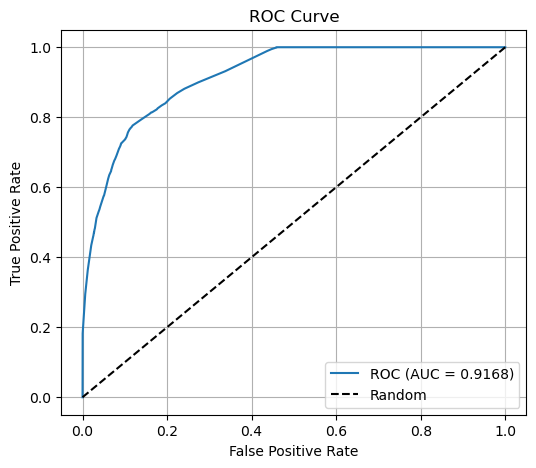

AUC: 0.9167796872988724


In [24]:
#Visualization A — ROC curve & AUC

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(pred_df['Actual'], pred_df['Predicted_Prob'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.4f})')
plt.plot([0,1],[0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

print("AUC:", roc_auc)


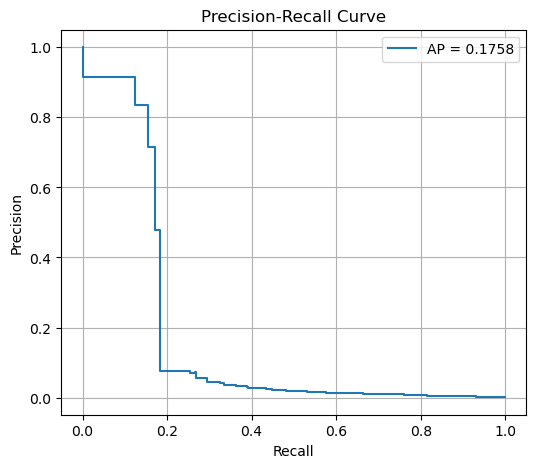

Average precision (AP): 0.17581522038527328


In [25]:
#Visualization B — Precision-Recall curve

from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(pred_df['Actual'], pred_df['Predicted_Prob'])
ap = average_precision_score(pred_df['Actual'], pred_df['Predicted_Prob'])

plt.figure(figsize=(6,5))
plt.step(recall, precision, where='post', label=f'AP = {ap:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

print("Average precision (AP):", ap)


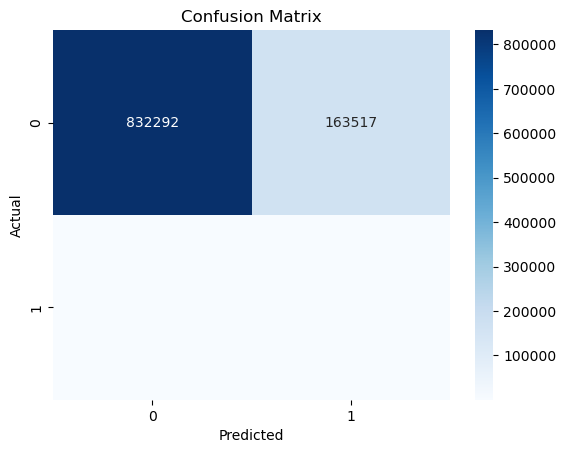

              precision    recall  f1-score   support

           0     0.9997    0.8358    0.9104    995809
           1     0.0065    0.8139    0.0128      1306

    accuracy                         0.8358    997115
   macro avg     0.5031    0.8249    0.4616    997115
weighted avg     0.9984    0.8358    0.9093    997115



In [26]:
#Visualization C — Confusion Matrix & classification metrics

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(pred_df['Actual'], pred_df['Predicted_Label'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(pred_df['Actual'], pred_df['Predicted_Label'], digits=4))


<Figure size 800x600 with 0 Axes>

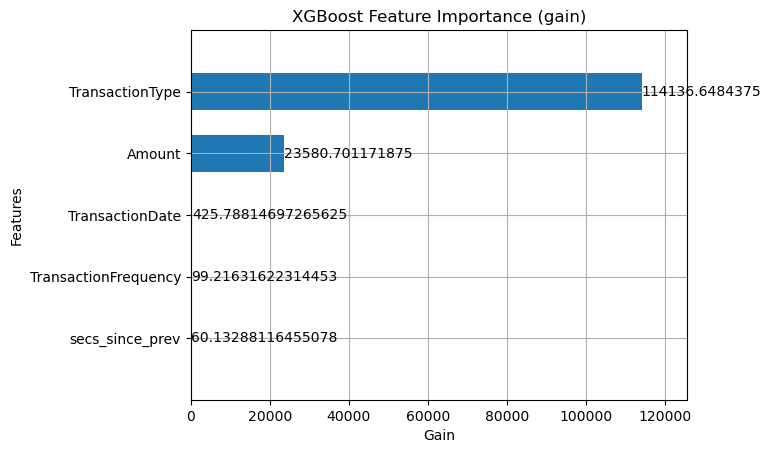

In [27]:
#Visualization D — Feature importance (XGBoost)

import matplotlib.pyplot as plt
import numpy as np
from xgboost import plot_importance

plt.figure(figsize=(8,6))
plot_importance(bst, importance_type='gain', max_num_features=20, xlabel='Gain', height=0.6)
plt.title('XGBoost Feature Importance (gain)')
plt.show()


In [ ]:
%pip install shap --quiet

/Users/shrutiiyer/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


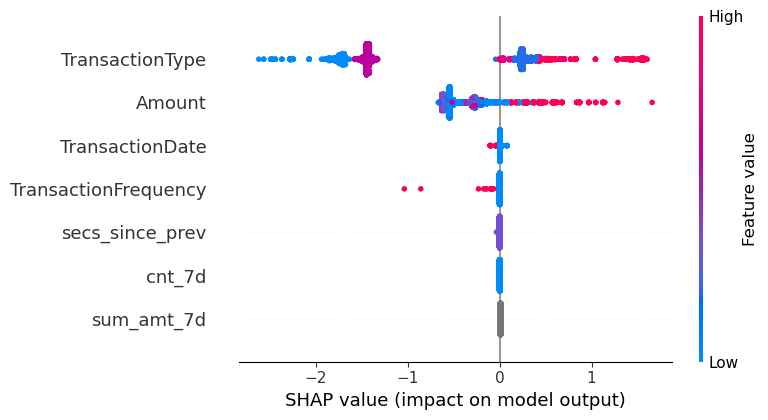

In [30]:
#Visualization E — SHAP (explainability)

import shap
# sample a subset to speed up SHAP
sample_X = X_test.sample(n=min(5000, len(X_test)), random_state=42)
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(sample_X)

# summary plot
shap.summary_plot(shap_values, sample_X, max_display=20)


In [31]:
# mean absolute shap per feature
shap_df = pd.DataFrame({
    'feature': sample_X.columns,
    'mean_abs_shap': np.abs(shap_values).mean(axis=0)
}).sort_values('mean_abs_shap', ascending=False)
shap_df.to_csv('shap_feature_importance.csv', index=False)
print(shap_df.head(10))


                feature  mean_abs_shap
1       TransactionType       1.017997
0                Amount       0.457714
2       TransactionDate       0.002297
3  TransactionFrequency       0.000768
4       secs_since_prev       0.000028
5            sum_amt_7d       0.000000
6                cnt_7d       0.000000


/Users/shrutiiyer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


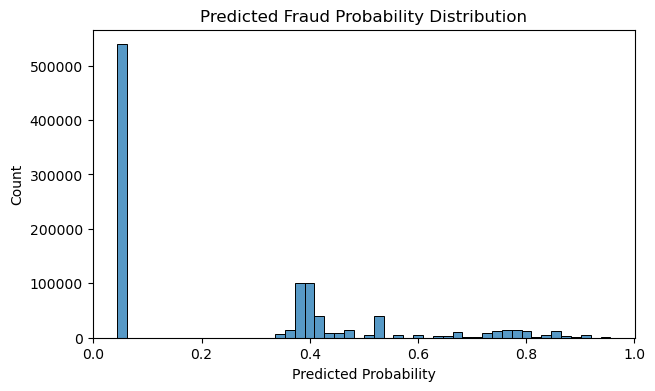

/Users/shrutiiyer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrutiiyer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


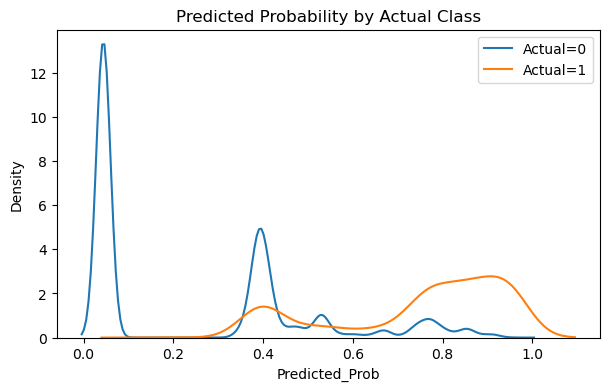

In [32]:
#Visualization F — Fraud probability distribution & thresholds

import seaborn as sns
plt.figure(figsize=(7,4))
sns.histplot(pred_df['Predicted_Prob'], bins=50, kde=False)
plt.title('Predicted Fraud Probability Distribution')
plt.xlabel('Predicted Probability')
plt.show()

# Show distribution split by actual class
plt.figure(figsize=(7,4))
sns.kdeplot(pred_df.loc[pred_df['Actual']==0, 'Predicted_Prob'], label='Actual=0', bw_adjust=1)
sns.kdeplot(pred_df.loc[pred_df['Actual']==1, 'Predicted_Prob'], label='Actual=1', bw_adjust=1)
plt.legend()
plt.title('Predicted Probability by Actual Class')
plt.show()


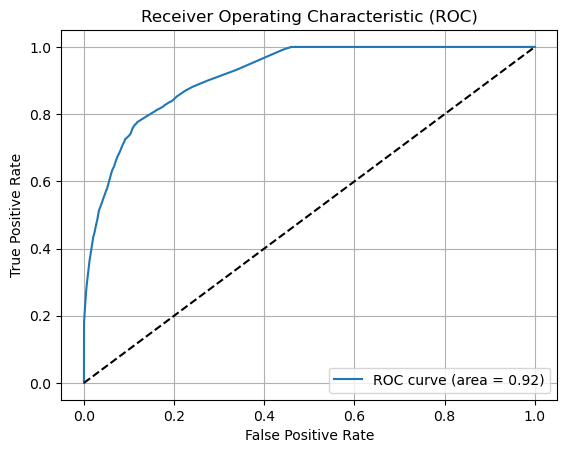

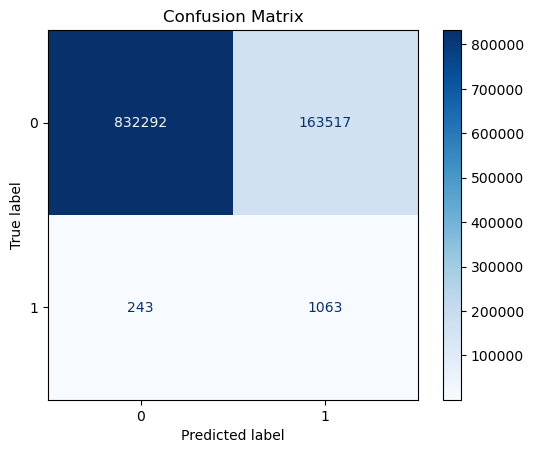

In [40]:
#Save visualization

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("/Users/shrutiiyer/Library/CloudStorage/OneDrive-SouthIndianEducationSociety/University of Dayton/SHRUTI JOB INDIA/PROJECTS/Financial Transactions Fraud Detection/roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.savefig("/Users/shrutiiyer/Library/CloudStorage/OneDrive-SouthIndianEducationSociety/University of Dayton/SHRUTI JOB INDIA/PROJECTS/Financial Transactions Fraud Detection/confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


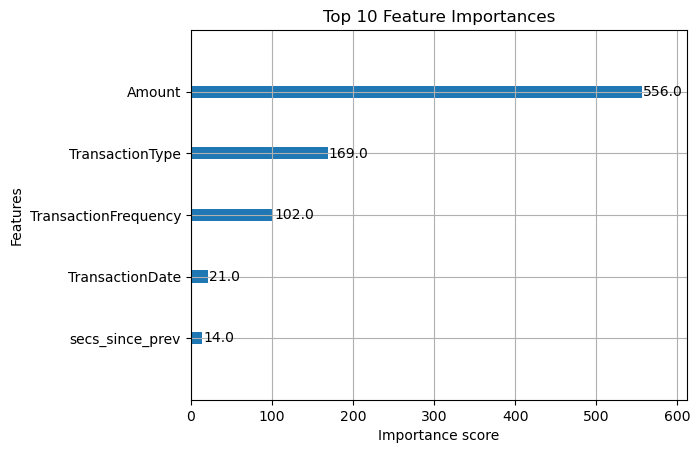

In [39]:
#Save Feature Importance chart

xgb.plot_importance(bst, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.savefig("/Users/shrutiiyer/Library/CloudStorage/OneDrive-SouthIndianEducationSociety/University of Dayton/SHRUTI JOB INDIA/PROJECTS/Financial Transactions Fraud Detection/feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [43]:
# quick export example (adjust column names to your dataset)
export_df = X_test.reset_index(drop=True).copy()
export_df['Actual'] = y_test.reset_index(drop=True)
export_df['Predicted_Prob'] = y_pred_proba
export_df['Predicted_Label'] = (export_df['Predicted_Prob'] > 0.5).astype(int)
export_df['TransactionDate'] = original_df_test['TransactionTime']  # ensure a date column exists
export_df.to_csv("/Users/shrutiiyer/Library/CloudStorage/OneDrive-SouthIndianEducationSociety/University of Dayton/SHRUTI JOB INDIA/PROJECTS/Financial Transactions Fraud Detection/fraud_predictions_for_powerbi.csv", index=False)


NameError: name 'original_df_test' is not defined

In [45]:
# 1. What are the unique values in y_test?
print("y_test unique values and counts:")
print(y_test.value_counts(dropna=False))

# 2. Quick peek of X_test + y_test together
tmp = X_test.reset_index(drop=True).copy()
tmp['Actual'] = y_test.reset_index(drop=True)
print("\nSample rows (first 10):")
print(tmp.head(10))

# 3. If you already exported CSV, inspect it:
import os
print("\nExport csv exists?", os.path.exists('fraud_predictions_for_powerbi.csv'))
if os.path.exists('fraud_predictions_for_powerbi.csv'):
    df_check = pd.read_csv('fraud_predictions_for_powerbi.csv')
    print("Exported CSV head:")
    print(df_check.head(10))
    print("Exported CSV Actual unique values and counts:")
    print(df_check['Actual'].value_counts(dropna=False))


y_test unique values and counts:
IsFraud
0    995800
1      1315
Name: count, dtype: int64

Sample rows (first 10):
      Amount TransactionType TransactionDate  TransactionFrequency  \
0  403438.12        CASH_OUT      1970-01-01                     1   
1    9748.46         PAYMENT      1970-01-01                     1   
2    6036.57        CASH_OUT      1970-01-01                     1   
3  126623.98        CASH_OUT      1970-01-01                     1   
4  180976.51        TRANSFER      1970-01-01                     1   
5    6864.67         PAYMENT      1970-01-01                     1   
6   14238.88         PAYMENT      1970-01-01                     1   
7    5345.02         PAYMENT      1970-01-01                     1   
8  114789.37         CASH_IN      1970-01-01                     1   
9   12406.03         PAYMENT      1970-01-01                     1   

   secs_since_prev  sum_amt_7d  cnt_7d  Actual  
0              0.0         NaN       0       0  
1              

In [47]:
import pandas as pd

# Ensure y_test and predictions are aligned
export_df = X_test.copy().reset_index(drop=True)

# Add back the actual label and model outputs
export_df['Actual'] = y_test.reset_index(drop=True).astype(int)
export_df['Predicted_Label'] = (y_pred > 0.5).astype(int)
export_df['Predicted_Prob'] = y_pred_prob

# 👀 Sanity check
print("Export shape:", export_df.shape)
print(export_df['Actual'].value_counts())

# See first 5 rows
print(export_df.head())
# Save to CSV for Power BI
export_df.to_csv("/Users/shrutiiyer/Library/CloudStorage/OneDrive-SouthIndianEducationSociety/University of Dayton/SHRUTI JOB INDIA/PROJECTS/Financial Transactions Fraud Detection/fraud_predictions_for_powerbi.csv", index=False)
print("✅ CSV exported successfully! File: fraud_predictions_for_powerbi.csv")


Export shape: (997115, 10)
Actual
0    995800
1      1315
Name: count, dtype: int64
      Amount TransactionType TransactionDate  TransactionFrequency  \
0  403438.12        CASH_OUT      1970-01-01                     1   
1    9748.46         PAYMENT      1970-01-01                     1   
2    6036.57        CASH_OUT      1970-01-01                     1   
3  126623.98        CASH_OUT      1970-01-01                     1   
4  180976.51        TRANSFER      1970-01-01                     1   

   secs_since_prev  sum_amt_7d  cnt_7d  Actual  Predicted_Label  \
0              0.0         NaN       0       0                0   
1              0.0         NaN       0       0                0   
2              0.0         NaN       0       0                0   
3              0.0         NaN       0       0                0   
4              0.0         NaN       0       0                0   

   Predicted_Prob  
0        0.399201  
1        0.384296  
2        0.043864  
3        0.0

In [48]:
check = pd.read_csv("/Users/shrutiiyer/Library/CloudStorage/OneDrive-SouthIndianEducationSociety/University of Dayton/SHRUTI JOB INDIA/PROJECTS/Financial Transactions Fraud Detection/fraud_predictions_for_powerbi.csv")
print(check['Actual'].value_counts())
check.head()

Actual
0    995800
1      1315
Name: count, dtype: int64


,Amount,TransactionType,TransactionDate,TransactionFrequency,secs_since_prev,sum_amt_7d,cnt_7d,Actual,Predicted_Label,Predicted_Prob
0,403438.12,CASH_OUT,1970-01-01,1,0.0,NaN,0,0,0,0.399201
1,9748.46,PAYMENT,1970-01-01,1,0.0,NaN,0,0,0,0.384296
2,6036.57,CASH_OUT,1970-01-01,1,0.0,NaN,0,0,0,0.043864
3,126623.98,CASH_OUT,1970-01-01,1,0.0,NaN,0,0,0,0.043864
4,180976.51,TRANSFER,1970-01-01,1,0.0,NaN,0,0,0,0.384296
